In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.metrics import mean_squared_error, r2_score
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = '/content/drive/MyDrive/machine learning/actividades ml/Predicción de Precios de Vehículos Usados (Core)/vehicles_sample_min.csv'
df = pd.read_csv(path)

In [ ]:
df.head(3)

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7315883828,https://lakeland.craigslist.org/ctd/d/lakeland...,lakeland,https://lakeland.craigslist.org,36990,2017.0,ford,f150 super cab lariat,good,6 cylinders,...,NaN,pickup,white,https://images.craigslist.org/00s0s_lRS7etJoVE...,Carvana is the safer way to buy a car During t...,NaN,fl,28.0400,-81.9600,2021-05-02T15:31:06-0400
1,7314599643,https://quadcities.craigslist.org/ctd/d/waterl...,"quad cities, IA/IL",https://quadcities.craigslist.org,27995,2006.0,chevrolet,corvette,good,8 cylinders,...,NaN,convertible,black,https://images.craigslist.org/00101_aa4DyXpKu0...,2006 *** Chevrolet Corvette Convertible Conver...,NaN,il,42.4778,-92.3661,2021-04-29T18:46:35-0500
2,7308399808,https://littlerock.craigslist.org/ctd/d/clinto...,little rock,https://littlerock.craigslist.org,78423,2015.0,chevrolet,corvette,NaN,8 cylinders,...,NaN,convertible,NaN,https://images.craigslist.org/00A0A_kJsL7mVMCg...,➔ Want to see more pictures?Paste this link to...,NaN,ar,38.4018,-93.7850,2021-04-17T14:01:33-0500


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            5000 non-null   int64  
 1   url           5000 non-null   object 
 2   region        5000 non-null   object 
 3   region_url    5000 non-null   object 
 4   price         5000 non-null   int64  
 5   year          4988 non-null   float64
 6   manufacturer  4805 non-null   object 
 7   model         4940 non-null   object 
 8   condition     2953 non-null   object 
 9   cylinders     2946 non-null   object 
 10  fuel          4961 non-null   object 
 11  odometer      4943 non-null   float64
 12  title_status  4901 non-null   object 
 13  transmission  4973 non-null   object 
 14  VIN           3115 non-null   object 
 15  drive         3528 non-null   object 
 16  size          1420 non-null   object 
 17  type          3961 non-null   object 
 18  paint_color   3507 non-null 

In [ ]:
# Normalizar nombre de las columnas
df.columns = df.columns.str.strip().str.lower()
df.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'vin', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')

In [ ]:
df.describe()

,id,price,year,odometer,county,lat,long
count,5.000000e+03,5.000000e+03,4988.000000,4.943000e+03,0.0,4915.000000,4915.000000
mean,7.311498e+09,1.846605e+04,2011.389334,1.016105e+05,NaN,38.439367,-94.891825
std,4.396341e+06,3.156453e+04,9.071645,2.793179e+05,NaN,5.875882,18.408618
min,7.301598e+09,0.000000e+00,1927.000000,0.000000e+00,NaN,-25.262575,-159.368300
25%,7.308131e+09,5.995000e+03,2009.000000,3.910350e+04,NaN,34.250103,-112.013768
50%,7.312712e+09,1.392500e+04,2014.000000,8.472300e+04,NaN,39.187084,-88.808027
75%,7.315281e+09,2.663475e+04,2017.000000,1.349145e+05,NaN,42.349229,-80.813847
max,7.317089e+09,1.234567e+06,2022.000000,9.999999e+06,NaN,64.842977,36.082260


# Limpieza y Preprocesamiento:

In [ ]:
df['state'].unique()

array(['fl', 'il', 'ar', 'oh', 'or', 'ia', 'tn', 'ny', 'nc', 'wi', 'id',
       'tx', 'hi', 'pa', 'co', 'ca', 'ct', 'ga', 'ma', 'mt', 'nj', 'mo',
       'az', 'mi', 'va', 'dc', 'md', 'wa', 'ok', 'al', 'ky', 'ne', 'vt',
       'sc', 'nh', 'la', 'ms', 'nm', 'nv', 'mn', 'ak', 'ks', 'sd', 'wv',
       'in', 'ri', 'ut', 'me', 'nd', 'wy', 'de'], dtype=object)

In [ ]:
# Eliminar columnas innecesarias
df = df.drop(columns=['id', 'url', 'region_url', 'model', 'vin', 'image_url', 'description', 'county', 'lat', 'long', 'size'])

In [ ]:
# Buscar duplicados duplicados
df.duplicated().sum()

np.int64(0)

Tratamos valores nulos

In [ ]:
# Tratar nulos
df.isna().sum()

,0
region,0
price,0
year,12
manufacturer,195
condition,2047
cylinders,2054
fuel,39
odometer,57
title_status,99
transmission,27


In [ ]:
# Al no poder imputar la variable year siendo pocos registros, opte por eliminarlos
df = df.dropna(subset=['year'])
df['year'].isnull().sum()

np.int64(0)

In [ ]:
df['year'] = df['year'].astype(int)

In [ ]:
# Rellenamos valores nulos con la moda
df['manufacturer'] = df['manufacturer'].fillna(df['manufacturer'].mode()[0])
df['manufacturer'].isna().sum()

np.int64(0)

In [ ]:
df['condition'].value_counts()

,count
condition,
good,1378
excellent,1206
like new,259
fair,85
new,16
salvage,9


In [ ]:
# Unificamos categorias redundantes
df['condition'] = df['condition'].replace('like new', 'excellent')
df['condition'].value_counts()

,count
condition,
excellent,1465
good,1378
fair,85
new,16
salvage,9


In [ ]:
# Rellenamos los nulos con la moda
df['condition'] = df['condition'].fillna(df['condition'].mode()[0])
df['condition'].isna().sum()

np.int64(0)

In [ ]:

df['cylinders'].value_counts()

,count
cylinders,
6 cylinders,1119
4 cylinders,887
8 cylinders,867
5 cylinders,23
10 cylinders,22
other,10
3 cylinders,4
12 cylinders,2


In [ ]:
# Pasamos a nulo los valores 'other' para imputarlos con la moda
df['cylinders'] = df['cylinders'].replace('other', np.nan)
df['cylinders'] = df['cylinders'].fillna(df['cylinders'].mode()[0])
df['cylinders'].isna().sum()

np.int64(0)

In [ ]:
# Pasamos variable a numerica
dicto = {'3 cylinders': 3, '4 cylinders': 4, '5 cylinders': 5, '6 cylinders': 6, '8 cylinders': 8, '10 cylinders': 10, '12 cylinders': 12}
df['cylinders'] = df['cylinders'].map(dicto)

In [ ]:
df['cylinders'].value_counts()

,count
cylinders,
6,3183
4,887
8,867
5,23
10,22
3,4
12,2


In [ ]:
df['fuel'].value_counts()

,count
fuel,
gas,4150
diesel,359
other,353
hybrid,66
electric,25


In [ ]:
df['fuel'] = df['fuel'].replace('other', np.nan)
df['fuel'] = df['fuel'].fillna(df['fuel'].mode()[0])
df['fuel'].value_counts()

,count
fuel,
gas,4538
diesel,359
hybrid,66
electric,25


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4988 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   region        4988 non-null   object 
 1   price         4988 non-null   int64  
 2   year          4988 non-null   int64  
 3   manufacturer  4988 non-null   object 
 4   condition     4988 non-null   object 
 5   cylinders     4988 non-null   int64  
 6   fuel          4988 non-null   object 
 7   odometer      4931 non-null   float64
 8   title_status  4893 non-null   object 
 9   transmission  4961 non-null   object 
 10  drive         3518 non-null   object 
 11  type          3950 non-null   object 
 12  paint_color   3495 non-null   object 
 13  state         4988 non-null   object 
 14  posting_date  4988 non-null   object 
dtypes: float64(1), int64(3), object(11)
memory usage: 623.5+ KB


In [ ]:
df['odometer'] = df['odometer'].fillna(df['odometer'].mean())
df['odometer'].isna().sum()

np.int64(0)

In [ ]:
# Esta no es una variable que se pueda imputar debido a su aspecto legal, asi que la trataremos como ' desconocida'
df['title_status'] = df['title_status'].fillna('unknown')
df['title_status'].isna().sum()

np.int64(0)

Las variables categoricas a continuación serán tratadas con la moda para no perder los registros.

In [ ]:
df['transmission'] = df['transmission'].fillna(df['transmission'].mode()[0])
df['transmission'].isna().sum()

np.int64(0)

In [ ]:
df['drive'] = df['drive'].fillna(df['drive'].mode()[0])
df['drive'].isna().sum()

np.int64(0)

In [ ]:
df['type'] = df['type'].fillna(df['type'].mode()[0])
df['type'].isna().sum()

np.int64(0)

In [ ]:
df['paint_color'] = df['paint_color'].fillna(df['paint_color'].mode()[0])
df['paint_color'].isna().sum()

np.int64(0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4988 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   region        4988 non-null   object 
 1   price         4988 non-null   int64  
 2   year          4988 non-null   int64  
 3   manufacturer  4988 non-null   object 
 4   condition     4988 non-null   object 
 5   cylinders     4988 non-null   int64  
 6   fuel          4988 non-null   object 
 7   odometer      4988 non-null   float64
 8   title_status  4988 non-null   object 
 9   transmission  4988 non-null   object 
 10  drive         4988 non-null   object 
 11  type          4988 non-null   object 
 12  paint_color   4988 non-null   object 
 13  state         4988 non-null   object 
 14  posting_date  4988 non-null   object 
dtypes: float64(1), int64(3), object(11)
memory usage: 623.5+ KB


In [ ]:
# convertimos a datetime
df['posting_date'] = pd.to_datetime(df['posting_date'], utc=True)

In [ ]:
df['price'].describe()

,price
count,4.988000e+03
mean,1.840081e+04
std,3.156328e+04
min,0.000000e+00
25%,5.995000e+03
50%,1.390000e+04
75%,2.652250e+04
max,1.234567e+06


In [ ]:
df.columns

Index(['region', 'price', 'year', 'manufacturer', 'condition', 'cylinders',
       'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'type',
       'paint_color', 'state', 'posting_date'],
      dtype='object')

Exploración de Datos:
---



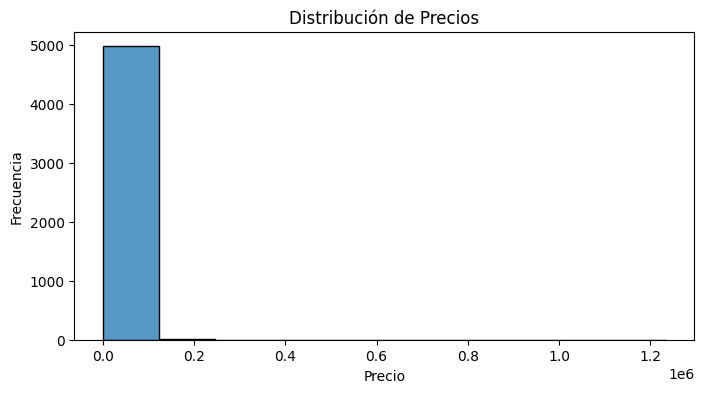

In [ ]:
# Histograma de precios
plt.figure(figsize=(8, 4))
sns.histplot(df['price'], bins=10)
plt.title("Distribución de Precios")
plt.xlabel("Precio")
plt.ylabel("Frecuencia")
plt.show()

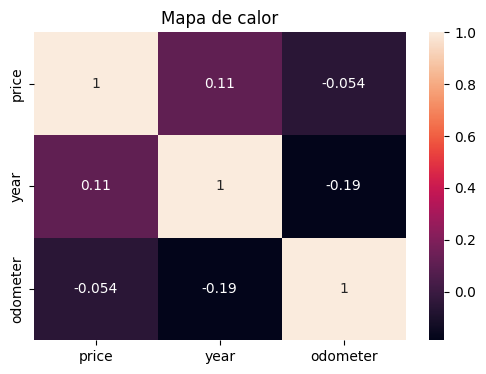

In [ ]:
# Mapa de calor de correlación
plt.figure(figsize=(6, 4))
sns.heatmap(df[['price', 'year', 'odometer']].corr(), annot=True)
plt.title("Mapa de calor")
plt.show()

Las variables precio y año tienen una relacion directa pero leve (mientras el año es mas reciente, mayor es el precio)

Las variables precio y odometro tienen una relacion levemente indirecta (mientras mayor es el odometro, menor es el precio)

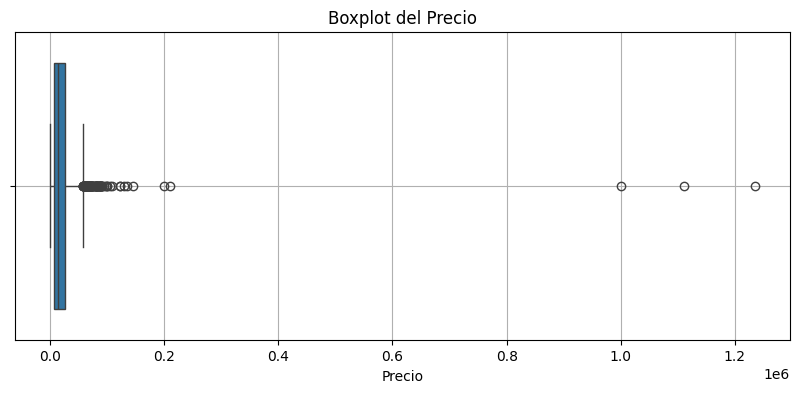

In [ ]:
#Boxplot de precio
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['price'])
plt.title('Boxplot del Precio')
plt.xlabel('Precio')
plt.grid(True)
plt.show()

En este gráfico detectamos la existencia de muchos valores outliers que pueden perturbar el modelo que vamos a aplicar, por lo tanto tratamos estos valores a contnuación


In [ ]:
# Utilizamos una fórmula de rango intercuartil (iqr) para excluir los valores outliers del margen superior.
q3 = df['price'].quantile(0.75)
iqr = q3 - df['price'].quantile(0.25)
limite_superior = q3 + 1.5 * iqr

df = df[df['price'] <= limite_superior]

#Modelado y Evaluación

In [ ]:
# Definir features
X = df.drop(columns=['price'])
y = df['price']

In [ ]:
# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Columnas categóricas y numéricas
categorical_cols = ['region', 'manufacturer', 'condition',
       'fuel', 'title_status', 'transmission', 'drive', 'type',
       'paint_color', 'state', 'cylinders']
numerical_cols = ['year', 'odometer']

# Preprocesador
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
])

### Linear Regression

In [ ]:
# Pipeline
pipeline_lr = Pipeline([
    ('preprocessing', preprocessor),
    ('regressor', LinearRegression())
])

In [ ]:
# Entrenamiento
pipeline_lr.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['year', 'odometer']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['region', 'manufacturer',
                                                   'condition', 'fuel',
                                                   'title_status',
                                                   'transmission', 'drive',
                                                   'type', 'paint_color',
                                                   'state', 'cylinders'])])),
                ('regressor', LinearRegression())])

In [ ]:
# Prediccion
y_pred_lr = pipeline_lr.predict(X_test)

In [ ]:
# Métricas de evaluacion
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression:")
print(f"  MSE: {mse_lr}")
print(f"  RMSE: {rmse_lr}")
print(f"  R²: {r2_lr}")

Linear Regression:
  MSE: 130806671.23312989
  RMSE: 11437.074417574186
  R²: 0.26395884409775694


### Random Forest Reggressor

In [ ]:
# Pipeline
pipeline_rf = Pipeline([
    ('preprocessing', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

In [ ]:
# Entrenamiento
pipeline_rf.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['year', 'odometer']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['region', 'manufacturer',
                                                   'condition', 'fuel',
                                                   'title_status',
                                                   'transmission', 'drive',
                                                   'type', 'paint_color',
                                                   'state', 'cylinders'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [ ]:
# Predicción
y_pred_rf = pipeline_rf.predict(X_test)

In [ ]:
# Métricas de evaluacion
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Regressor:")
print(f"  MSE: {mse_rf}")
print(f"  RMSE: {rmse_rf}")
print(f"  R²: {r2_rf}")

Random Forest Regressor:
  MSE: 88254316.60077427
  RMSE: 9394.376860695673
  R²: 0.5033983466453043


###Optimización del Modelo

In [ ]:
# Pipeline
pipeline_forest = Pipeline([
    ("pp", preprocessor),
    ("model", RandomForestRegressor(random_state=42))
])

In [ ]:
forest_params = {
    "model__n_estimators": [100, 200]
}

forest_grid = GridSearchCV(pipeline_forest, forest_params, cv=5, scoring="r2")
forest_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('pp',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['year',
                                                                          'odometer']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['region',
                                                                          'manufacturer',
                                                                          'condition',
                                                                          'fuel',
                                                                          'title_status',
                                                                          'transmission',
                                                                          'drive',
                                                                          'type',
                                                                          'paint_color',
                                                                          'state',
                                                                          'cylinders'])])),
                                       ('model',
                                        RandomForestRegressor(random_state=42))]),
             param_grid={'model__n_estimators': [100, 200]}, scoring='r2')

In [ ]:
# Evaluación.
forest_best = forest_grid.best_estimator_
y_pred_forest = forest_best.predict(X_test)

print("Forest Regressor")
print("Mejores parámetros:", forest_grid.best_params_)
print("R²:", r2_score(y_test, y_pred_forest))

Forest Regressor
Mejores parámetros: {'model__n_estimators': 100}
R²: 0.5033983466453043


El modelo que funciona mejor es el de Random Forest Regressor, con las metricas:

  * MSE: 88254316.60077427
  * RMSE: 9394.376860695673
  * R²: 0.5033983466453043

Sin embargo, el margen de error sigue siendo muy amplio.